<a href="https://colab.research.google.com/github/VISHAL2077/SML_Assignments/blob/main/Assignment_12_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

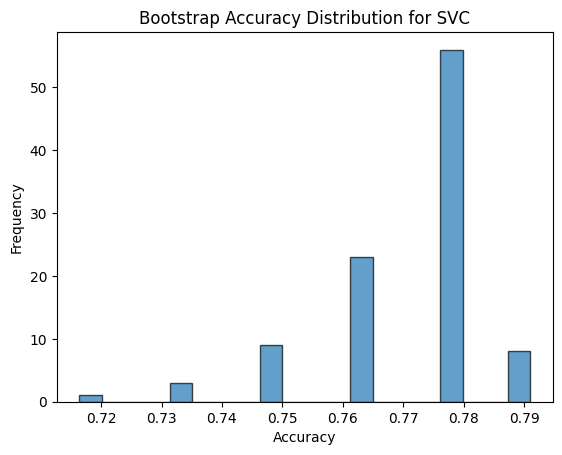

Generating bootstrap plot for KNN...


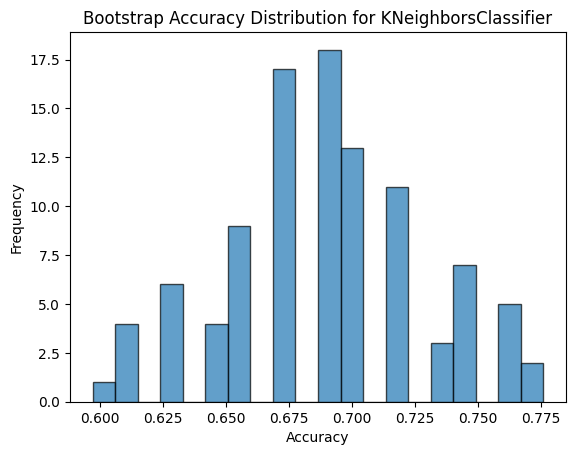

Generating bootstrap plot for Logistic Regression...


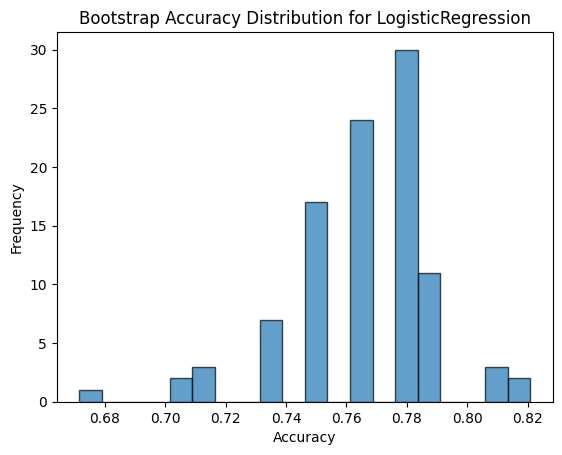

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import resample

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

def bootstrap_plot(model, X_train, y_train, X_test, y_test, n_iterations=100):
    accuracies = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X_train, y_train, random_state=None)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    plt.hist(accuracies, bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Bootstrap Accuracy Distribution for {type(model).__name__}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.show()

for name, model in models.items():
    print(f"Generating bootstrap plot for {name}...")
    bootstrap_plot(model, X_train, y_train, X_test, y_test)
